# Digit Recognizer

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/SaadRasheed-exe/Image-Classification-on-Food-101/blob/master)


Aim of this project is to recognize digits from hand written images.\
Dataset was retrieved from <a href="https://www.kaggle.com/competitions/digit-recognizer/data">here</a>.

## Imports and Downloads

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import random as rn
from helper import plot_loss_metrics, confusion_matrix_heatmap

from sklearn.metrics import classification_report

import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.python as tfp
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers
import tensorflow.keras.callbacks as callbacks
import tensorflow.keras.optimizers as optimizers

## Data Exploration

In [2]:
train_df = pd.read_csv('train.csv')
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test_df = pd.read_csv('test.csv')
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_features = train_df.drop('label', axis=1)
train_labels = train_df['label']

Label classes are almost balanced. Hence, accuracy will be a good metric for evaluation.

In [5]:
train_labels.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

The images are 28 pixels by 28 pixels large.

In [6]:
784 ** 0.5

28.0

In [7]:
IMG_SHAPE = (28, 28)

The pixel values range from 0 (white) to 255 (black).

In [8]:
train_features.min().min(), train_features.max().max()

(0, 255)

## Data Visualization

In [9]:
def view_random_digit():
    random_entry = rn.randint(0, len(train_features))
    plt.figure(figsize=(10,10))
    sns.heatmap(train_features.iloc[random_entry].values.reshape(IMG_SHAPE), cmap="gray_r", xticklabels=False, yticklabels=False, cbar=False)

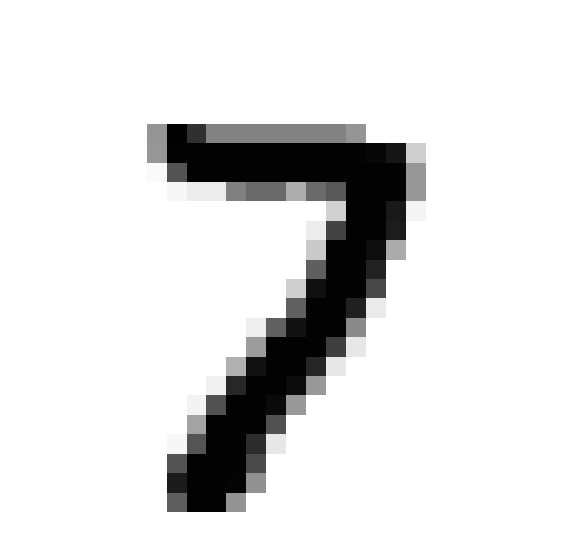

In [10]:
# viewing random digits
view_random_digit()

## Image Preprocessing

Generating Tensors from Images.

In [11]:
tensors = None

for i in train_features.values:
    if tensors is None:
        tensors = [i.reshape(IMG_SHAPE)]
        continue
    tensors = np.concatenate([tensors, [i.reshape(IMG_SHAPE)]])

In [12]:
tensors = tf.expand_dims(tensors, axis=-1)

In [13]:
tensors.shape

TensorShape([42000, 28, 28, 1])

## Model

In [51]:
# defining the model

inputs = layers.Input(shape=IMG_SHAPE + (1,), name='Input')

rescale = layers.Rescaling(1./255, name="Rescale")
x = rescale(inputs)
x = layers.Conv2D(10, 3, activation='relu')(x)
x = layers.Conv2D(10, 3, activation='relu')(x)
x = layers.MaxPool2D()(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.25)(x)
x = layers.Conv2D(10, 3, activation='relu')(x)
x = layers.Conv2D(10, 3, activation='relu')(x)
x = layers.MaxPool2D()(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.25)(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.25)(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(10, activation='softmax', name='Output')(x)

model = models.Model(inputs=inputs, outputs=outputs, name="digit_recognizer")

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizers.Adam(learning_rate=0.001))
model.summary()

Model: "digit_recognizer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 28, 28, 1)]       0         
                                                                 
 Rescale (Rescaling)         (None, 28, 28, 1)         0         
                                                                 
 conv2d_10 (Conv2D)          (None, 26, 26, 10)        100       
                                                                 
 conv2d_11 (Conv2D)          (None, 24, 24, 10)        910       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 12, 12, 10)       0         
 g2D)                                                            
                                                                 
 batch_normalization_12 (Bat  (None, 12, 12, 10)       40        
 chNormalization)                                 

In [15]:
# One hot encoding the labels
labels = tf.one_hot(train_labels, depth=10)

In [52]:
# train split
X_train = tensors[:41000]
y_train = labels[:41000]

# test split
X_test = tensors[41000:]
y_test = labels[41000:]

In [45]:
# callback to stop training at minimum validation loss
early_stop = callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True, verbose=1)

In [53]:
# train model
history = model.fit(x=X_train, y=y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop], verbose=1)

Epoch 1/100
1282/1282 [==============================] - 23s 17ms/step - loss: 0.5528 - accuracy: 0.8324 - val_loss: 0.1367 - val_accuracy: 0.9560
Epoch 2/100
1282/1282 [==============================] - 23s 18ms/step - loss: 0.1957 - accuracy: 0.9413 - val_loss: 0.0799 - val_accuracy: 0.9770
Epoch 3/100
1282/1282 [==============================] - 24s 19ms/step - loss: 0.1537 - accuracy: 0.9542 - val_loss: 0.0910 - val_accuracy: 0.9740
Epoch 4/100
1282/1282 [==============================] - 24s 19ms/step - loss: 0.1303 - accuracy: 0.9613 - val_loss: 0.0539 - val_accuracy: 0.9800
Epoch 5/100
1282/1282 [==============================] - 24s 19ms/step - loss: 0.1175 - accuracy: 0.9647 - val_loss: 0.0595 - val_accuracy: 0.9810
Epoch 6/100
1282/1282 [==============================] - 24s 19ms/step - loss: 0.1059 - accuracy: 0.9685 - val_loss: 0.0601 - val_accuracy: 0.9820
Epoch 7/100
1282/1282 [==============================] - 24s 19ms/step - loss: 0.0997 - accuracy: 0.9695 - val_loss: 0

## Model Evaluation

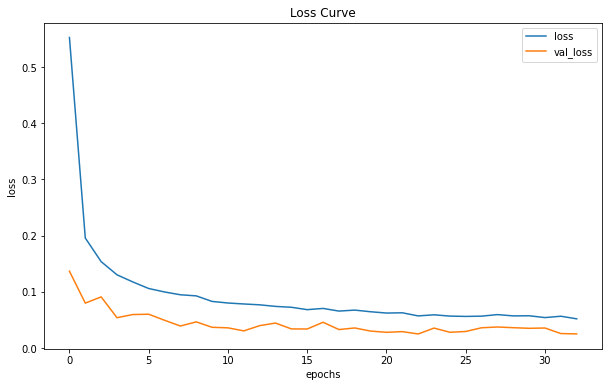

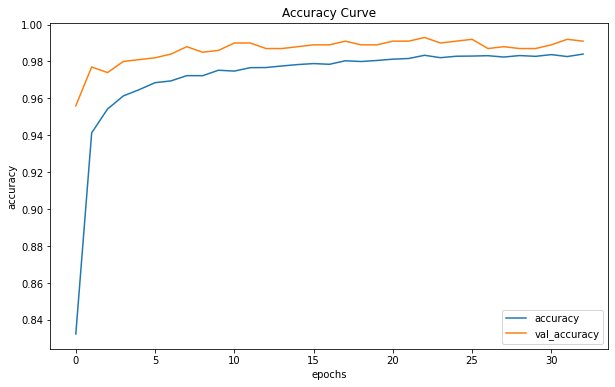

In [54]:
plot_loss_metrics(history=history, metrics=['accuracy'])

In [63]:
# model accuracy:
model.evaluate(X_test, y_test);

32/32 [==============================] - 0s 6ms/step - loss: 0.0249 - accuracy: 0.9930


In [55]:
# Getting predictions
predictions = model.predict(X_test)

32/32 [==============================] - 0s 5ms/step


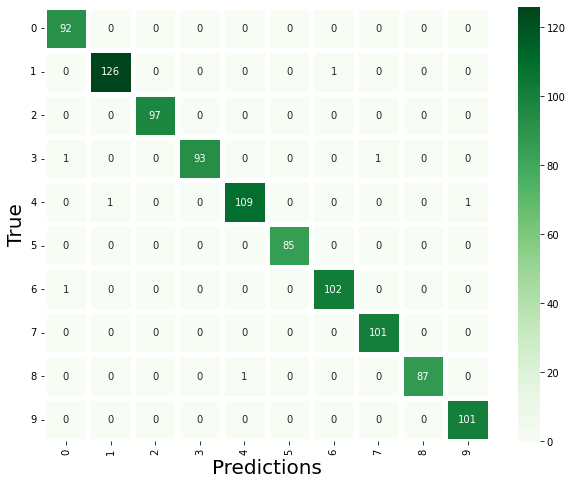

In [56]:
# confusion matrix for classification result
confusion_matrix_heatmap(y_true=np.argmax(y_test, axis=1), y_pred=predictions.argmax(1))

In [57]:
# classification report for the results
print(classification_report(y_true=np.argmax(y_test, axis=1), y_pred=predictions.argmax(1)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        92
           1       0.99      0.99      0.99       127
           2       1.00      1.00      1.00        97
           3       1.00      0.98      0.99        95
           4       0.99      0.98      0.99       111
           5       1.00      1.00      1.00        85
           6       0.99      0.99      0.99       103
           7       0.99      1.00      1.00       101
           8       1.00      0.99      0.99        88
           9       0.99      1.00      1.00       101

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



## Submission for Competition

In [37]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# creating tensors for the submission set

submission_tensors = None

for i in test_df.values:
    if submission_tensors is None:
        submission_tensors = [i.reshape(IMG_SHAPE)]
        continue
    submission_tensors = np.concatenate([submission_tensors, [i.reshape(IMG_SHAPE)]])

In [58]:
# getting predictions for the submission set
submission_preds = model.predict(tf.expand_dims(submission_tensors, axis=-1))

875/875 [==============================] - 5s 5ms/step


In [59]:
submission = pd.read_csv('sample_submission.csv', index_col='ImageId')
submission.head()

,Label
ImageId,
1,0
2,0
3,0
4,0
5,0


In [60]:
# storing predictions
submission['Label'] = submission_preds.argmax(1)
submission

,Label
ImageId,
1,2
2,0
3,9
4,9
5,3
...,...
27996,9
27997,7
27998,3


In [61]:
submission.to_csv('submission004.csv')

## Conclusion

This model can recognize a hand written digit with 99.3% accuracy. This was achieved by adding batch normalization and dropout layers to the barebones baseline model.